<a href="https://colab.research.google.com/github/FaHIGH/-DaScienceEcosystem/blob/main/Horse_or_human_small.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# #Only use Colab

---



In [5]:
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [6]:
!wget --no-check-certificate \
    https://storage.googleapis.com/learning-datasets/horse-or-human.zip \
    -O /tmp/horse-or-human.zip

!wget --no-check-certificate \
    https://storage.googleapis.com/learning-datasets/validation-horse-or-human.zip \
    -O /tmp/validation-horse-or-human.zip

--2024-03-09 08:40:29--  https://storage.googleapis.com/learning-datasets/horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.130.207, 64.233.170.207, 74.125.68.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.130.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149574867 (143M) [application/zip]
Saving to: ‘/tmp/horse-or-human.zip’

/tmp/horse-or-human 100%[===================>] 142.65M  23.3MB/s    in 7.2s    

2024-03-09 08:40:37 (19.7 MB/s) - ‘/tmp/horse-or-human.zip’ saved [149574867/149574867]

--2024-03-09 08:40:37--  https://storage.googleapis.com/learning-datasets/validation-horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.130.207, 64.233.170.207, 74.125.68.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.130.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11480187 (11M) [application/zip]
S

# Download File Dataset

---







In [7]:
import os
import zipfile

local_zip = '/tmp/horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/horse-or-human')
local_zip = '/tmp/validation-horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/validation-horse-or-human')
zip_ref.close()

# Directory with our training horse pictures
train_horse_dir = os.path.join('/tmp/horse-or-human/horses')

# Directory with our training human pictures
train_human_dir = os.path.join('/tmp/horse-or-human/humans')

# Directory with our training horse pictures
validation_horse_dir = os.path.join('/tmp/validation-horse-or-human/horses')

# Directory with our training human pictures
validation_human_dir = os.path.join('/tmp/validation-horse-or-human/humans')

train_horse_names = os.listdir('/tmp/horse-or-human/horses')
print(train_horse_names[:10])

train_human_names = os.listdir('/tmp/horse-or-human/humans')
print(train_human_names[:10])

validation_horse_hames = os.listdir('/tmp/validation-horse-or-human/horses')
print(validation_horse_hames[:10])

validation_human_names = os.listdir('/tmp/validation-horse-or-human/humans')
print(validation_human_names[:10])

['horse18-7.png', 'horse29-2.png', 'horse43-1.png', 'horse02-4.png', 'horse01-2.png', 'horse34-3.png', 'horse45-8.png', 'horse31-0.png', 'horse01-6.png', 'horse50-7.png']
['human09-28.png', 'human03-20.png', 'human06-08.png', 'human01-30.png', 'human12-00.png', 'human06-17.png', 'human02-19.png', 'human01-08.png', 'human03-07.png', 'human16-17.png']
['horse1-411.png', 'horse6-345.png', 'horse4-159.png', 'horse1-554.png', 'horse3-541.png', 'horse2-269.png', 'horse4-043.png', 'horse4-232.png', 'horse2-544.png', 'horse5-514.png']
['valhuman03-15.png', 'valhuman02-12.png', 'valhuman01-08.png', 'valhuman04-23.png', 'valhuman02-01.png', 'valhuman05-17.png', 'valhuman01-07.png', 'valhuman05-05.png', 'valhuman01-06.png', 'valhuman05-15.png']


In [8]:
import urllib.request
import zipfile

url = "https://storage.googleapis.com/learning-datasets/horse-or-human.zip"

file_name = 'horse-or-human.zip'
training_dir = 'horse-or-human/training/'
urllib.request.urlretrieve(url, file_name)

zip_ref = zipfile.ZipFile(file_name, 'r')
zip_ref.extractall(training_dir)
zip_ref.close()

#Import Picture

---



In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# All inages will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1/255)

train_generator = train_datagen.flow_from_directory(
    training_dir,
    target_size = (300,300),
    class_mode = 'binary'
)

Found 1027 images belonging to 2 classes.


# #**Training Model round 1**

---



In [10]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['accuracy']
              )

history = model.fit(
    train_generator,
    epochs = 15
)

Epoch 1/15
33/33 [==============================] - 16s 278ms/step - loss: 0.6873 - accuracy: 0.5969
Epoch 2/15
33/33 [==============================] - 9s 258ms/step - loss: 0.5744 - accuracy: 0.8189
Epoch 3/15
33/33 [==============================] - 9s 273ms/step - loss: 0.1720 - accuracy: 0.9435
Epoch 4/15
33/33 [==============================] - 9s 261ms/step - loss: 0.1568 - accuracy: 0.9416
Epoch 5/15
33/33 [==============================] - 8s 240ms/step - loss: 0.1130 - accuracy: 0.9581
Epoch 6/15
33/33 [==============================] - 9s 260ms/step - loss: 0.1296 - accuracy: 0.9649
Epoch 7/15
33/33 [==============================] - 9s 262ms/step - loss: 0.0848 - accuracy: 0.9757
Epoch 8/15
33/33 [==============================] - 9s 262ms/step - loss: 0.0552 - accuracy: 0.9825
Epoch 9/15
33/33 [==============================] - 8s 247ms/step - loss: 0.0328 - accuracy: 0.9873
Epoch 10/15
33/33 [==============================] - 8s 241ms/step - loss: 0.0053 - accuracy: 0.999

In [12]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 298, 298, 16)      448       
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 149, 149, 16)      0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 147, 147, 32)      4640      
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 73, 73, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 71, 71, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 35, 35, 64)       

# Training Model round 2

---



In [18]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be augmented
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

# Flow training images in batches of 128 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        '/tmp/horse-or-human/',  # This is the source directory for training images
        target_size=(300, 300),  # All images will be resized to 150x150
        batch_size=128,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

validation_datagen = ImageDataGenerator(rescale=1/255)

validation_generator = train_datagen.flow_from_directory(
        '/tmp/validation-horse-or-human',
        target_size=(300, 300),
        class_mode='binary')


history = model.fit(
      train_generator,
      steps_per_epoch=8,
      epochs=15,
      verbose=1,
      validation_data=validation_generator
      )

Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.
Epoch 1/15
8/8 [==============================] - 33s 4s/step - loss: 0.3857 - accuracy: 0.8587 - val_loss: 0.6287 - val_accuracy: 0.8047
Epoch 2/15
8/8 [==============================] - 33s 4s/step - loss: 0.1705 - accuracy: 0.9388 - val_loss: 1.7815 - val_accuracy: 0.7461
Epoch 3/15
8/8 [==============================] - 33s 4s/step - loss: 0.1346 - accuracy: 0.9434 - val_loss: 1.3244 - val_accuracy: 0.7852
Epoch 4/15
8/8 [==============================] - 33s 4s/step - loss: 0.1392 - accuracy: 0.9522 - val_loss: 1.2775 - val_accuracy: 0.7109
Epoch 5/15
8/8 [==============================] - 33s 4s/step - loss: 0.2422 - accuracy: 0.9043 - val_loss: 1.3261 - val_accuracy: 0.6953
Epoch 6/15
8/8 [==============================] - 33s 4s/step - loss: 0.1151 - accuracy: 0.9570 - val_loss: 2.7905 - val_accuracy: 0.6328
Epoch 7/15
8/8 [==============================] - 32s 4s/step - loss: 0.1438 - accuracy: 

#**Predict Model**



---





In [19]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():

  # predicting images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(300, 300))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  image_tensor = np.vstack([x])
  classes = model.predict(image_tensor)
  print(classes)
  print(classes[0])
  if classes[0]>0.5:
    print(fn + " is a human")
  else:
    print(fn + " is a horse")

Saving horse1.jpg to horse1 (2).jpg
Saving horse2.jpg to horse2 (2).jpg
Saving horse-women.jpg to horse-women (2).jpg
Saving human1.jpg to human1 (2).jpg
Saving istockphoto-1164850651-612x612.jpg to istockphoto-1164850651-612x612 (2).jpg
1/1 [==============================] - 0s 18ms/step
[[1.]]
[1.]
horse1 (2).jpg is a human
1/1 [==============================] - 0s 18ms/step
[[0.]]
[0.]
horse2 (2).jpg is a horse
1/1 [==============================] - 0s 21ms/step
[[1.]]
[1.]
horse-women (2).jpg is a human
1/1 [==============================] - 0s 21ms/step
[[0.]]
[0.]
human1 (2).jpg is a horse
1/1 [==============================] - 0s 20ms/step
[[0.]]
[0.]
istockphoto-1164850651-612x612 (2).jpg is a horse


# **Intermediate epresentations**

---



In [20]:
# Directory with our training horse pictures
train_horse_dir = os.path.join('/tmp/horse-or-human/horses')

# Directory with our training human pictures
train_human_dir = os.path.join('/tmp/horse-or-human/humans')

# Directory with our training horse pictures
validation_horse_dir = os.path.join('/tmp/validation-horse-or-human/horses')

# Directory with our training human pictures
validation_human_dir = os.path.join('/tmp/validation-horse-or-human/humans')

train_horse_names = os.listdir('/tmp/horse-or-human/horses')
print(train_horse_names[:10])

train_human_names = os.listdir('/tmp/horse-or-human/humans')
print(train_human_names[:10])

validation_horse_hames = os.listdir('/tmp/validation-horse-or-human/horses')
print(validation_horse_hames[:10])

validation_human_names = os.listdir('/tmp/validation-horse-or-human/humans')
print(validation_human_names[:10])

['horse18-7.png', 'horse29-2.png', 'horse43-1.png', 'horse02-4.png', 'horse01-2.png', 'horse34-3.png', 'horse45-8.png', 'horse31-0.png', 'horse01-6.png', 'horse50-7.png']
['human09-28.png', 'human03-20.png', 'human06-08.png', 'human01-30.png', 'human12-00.png', 'human06-17.png', 'human02-19.png', 'human01-08.png', 'human03-07.png', 'human16-17.png']
['horse1-411.png', 'horse6-345.png', 'horse4-159.png', 'horse1-554.png', 'horse3-541.png', 'horse2-269.png', 'horse4-043.png', 'horse4-232.png', 'horse2-544.png', 'horse5-514.png']
['valhuman03-15.png', 'valhuman02-12.png', 'valhuman01-08.png', 'valhuman04-23.png', 'valhuman02-01.png', 'valhuman05-17.png', 'valhuman01-07.png', 'valhuman05-05.png', 'valhuman01-06.png', 'valhuman05-15.png']


1/1 [==============================] - 0s 107ms/step


<ipython-input-21-c6e4fdb7b79f>:44: RuntimeWarning: invalid value encountered in divide
  x /= x.std()
<ipython-input-21-c6e4fdb7b79f>:47: RuntimeWarning: invalid value encountered in cast
  x = np.clip(x, 0, 255).astype('uint8')


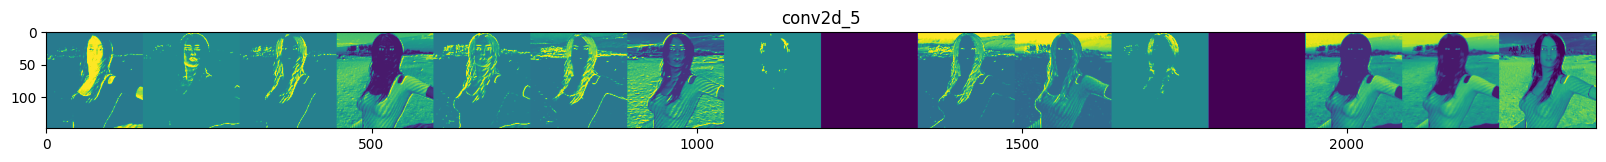

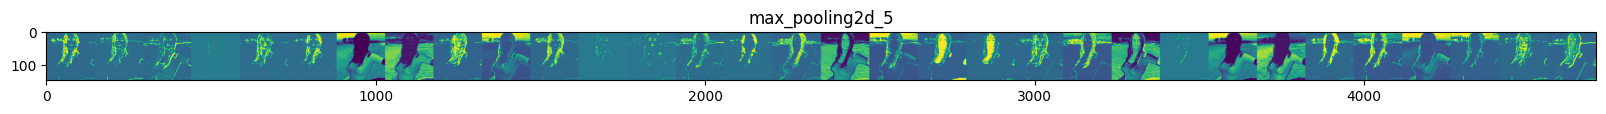

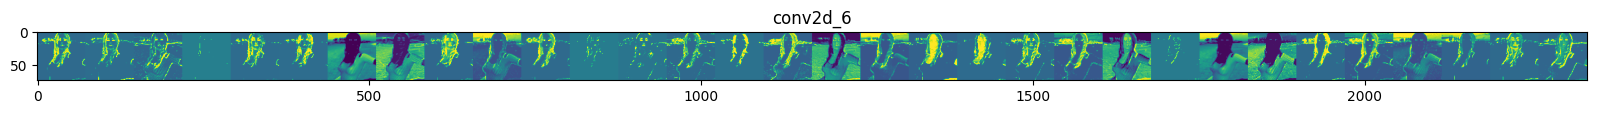

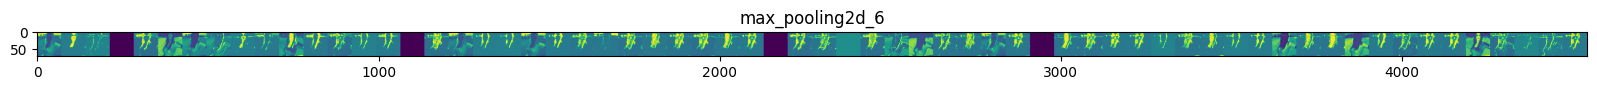

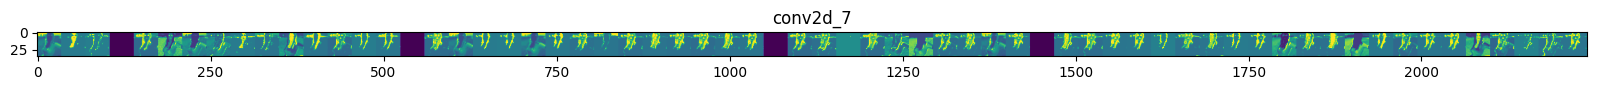

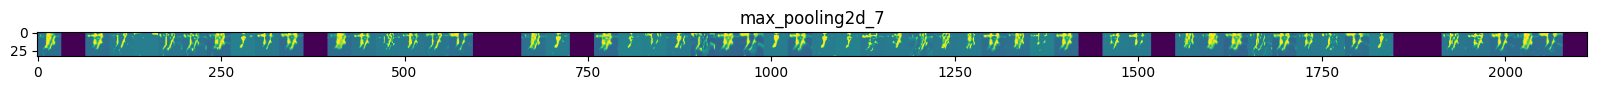

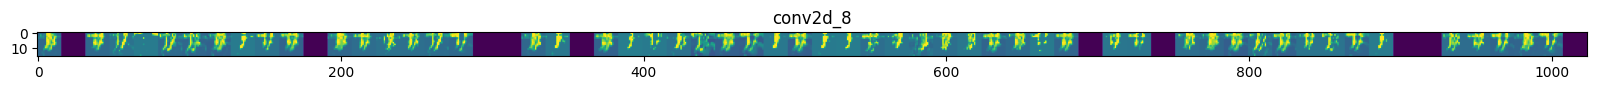

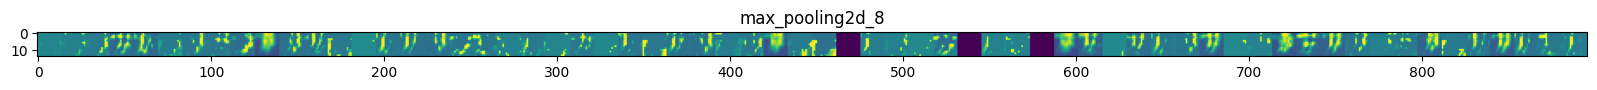

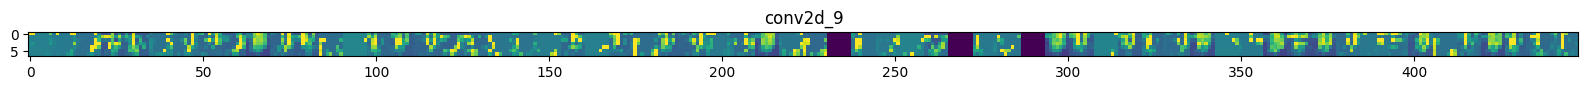

In [21]:
import matplotlib.pyplot as plt
import numpy as np
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img

# Let's define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model after
# the first.
successive_outputs = [layer.output for layer in model.layers[1:]]
#visualization_model = Model(img_input, successive_outputs)
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)
# Let's prepare a random input image from the training set.
horse_img_files = [os.path.join(train_horse_dir, f) for f in train_horse_names]
human_img_files = [os.path.join(train_human_dir, f) for f in train_human_names]
img_path = random.choice(horse_img_files + human_img_files)

img = load_img(img_path, target_size=(300, 300))  # this is a PIL image
x = img_to_array(img)  # Numpy array with shape (150, 150, 3)
x = x.reshape((1,) + x.shape)  # Numpy array with shape (1, 150, 150, 3)

# Rescale by 1/255
x /= 255

# Let's run our image through our network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in model.layers]

# Now let's display our representations
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  if len(feature_map.shape) == 4:
    # Just do this for the conv / maxpool layers, not the fully-connected layers
    n_features = feature_map.shape[-1]  # number of features in feature map
    # The feature map has shape (1, size, size, n_features)
    size = feature_map.shape[1]
    # We will tile our images in this matrix
    display_grid = np.zeros((size, size * n_features))
    for i in range(n_features):
      # Postprocess the feature to make it visually palatable
      x = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std()
      x *= 64
      x += 128
      x = np.clip(x, 0, 255).astype('uint8')
      # We'll tile each filter into this big horizontal grid
      display_grid[:, i * size : (i + 1) * size] = x
    # Display the grid
    scale = 20. / n_features
    plt.figure(figsize=(scale * n_features, scale))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')


#clean Up

---



In [ ]:
import os, signal
os.kill(os.getpid(), signal.SIGKILL)